<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/rahatalberuni/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Sensor Data Analysis with phyphox and Python

## Measuring data with Smartphone Sensors  
Modern smartphones contain sophisticated sensor arrays capable of capturing high-quality physical measurements. This assignment integrates sensor data collection via the **phyphox** app with computational analysis using Python's `numpy`, `scipy`, and `pandas` libraries.

## Learning outcome
- read data in python using pandas
- quantify measurement uncertainty
- plot data
- validate theoretical models against experimental data


## Part 1: Experimental Setup with phyphox (10 points)
**Task: Data Acquisition**  
1. Design an experiment using your phone's **3-axis accelerometer** (e.g., free-fall, pendulum motion, or elevator acceleration).  
2. Configure phyphox to record data at ≥100 Hz sampling rate
3. Export 1-60 seconds of raw acceleration data (`acceleration.csv`) with timestamps.  




## I dropped my phone from about 2.4 metres height with Phyphox turned on and expertoted the raw data as csv file. I used the acceleration with g function of Phyphox in order to collect collect data. The app used my phones x,y,z accelerometer to record the data.
# Heres the link to the raw accleration data:[acceleration.csv](https://ubuffalo-my.sharepoint.com/:x:/g/personal/arraihan_buffalo_edu/EZZtsYJsjXZEmdvl-NqBjvIBKQomD7VCRbB2dUQcbGinwQ?e=1Znzua)


## Part 2: Data Analysis with pandas and NumPy (8 points)
**Task: Data Preprocessing**
- upload the csv to google colab
- read in csv file using `pandas`
- remove beginning and end of data where experiment didn't start yet / was already over (check part 3)


In [3]:
import pandas as pd

# Assuming the CSV file is uploaded to your Colab environment

data_a = pd.read_csv('acceleration.csv', index_col=0)



print(data_a.head())  # Display the first few rows of the dataframe


          Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
Time (s)                                                   
0.007096                0.272782                0.311067   
0.009201                0.291924                0.306281   
0.011305                0.330210                0.306281   
0.013409                0.382852                0.311067   
0.015514                0.440279                0.315853   

          Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
Time (s)                                                         
0.007096                8.886943                       8.896568  
0.009201                8.915657                       8.925691  
0.011305                8.977871                       8.989161  
0.013409                9.040084                       9.053533  
0.015514                9.121440                       9.137520  


<Axes: xlabel='Time (s)'>

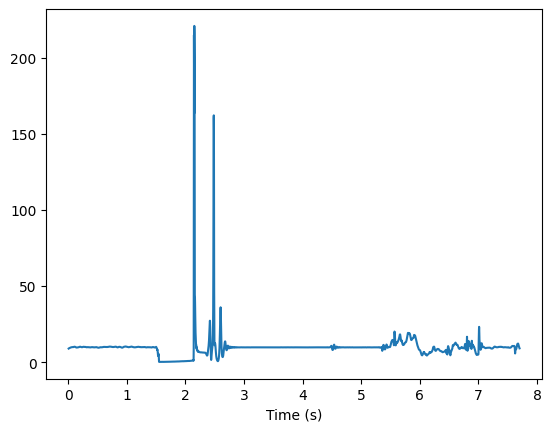

In [4]:
data_a['Absolute acceleration (m/s^2)'].plot()

Above is the plot of the whole data and now we need to remove the beginning and the end of data when the experiment started.

<Axes: xlabel='Time (s)'>

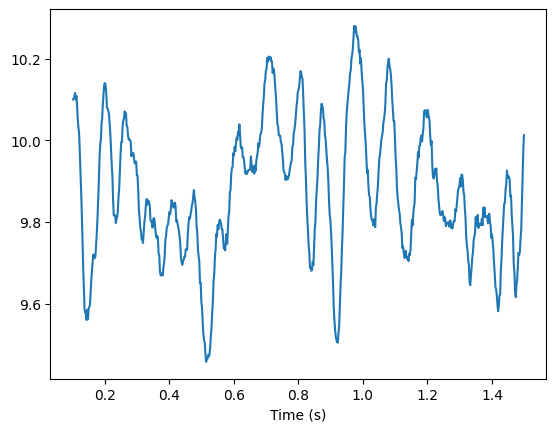

In [21]:
data_a['Absolute acceleration (m/s^2)'] \
 [(data_a['Absolute acceleration (m/s^2)'].index<1.5) & \
  (data_a['Absolute acceleration (m/s^2)'].index>0.1)].plot()



## Part 3: Model Fitting and Visualization (8 points)

**Task: Plot preprocessed data using pandas**
- plot time vs acceleration

**Task: Model fit**
- use `scipy.optimize.curve_fit` to fit a physics model to your data

Examples:

- **Gravitational Acceleration**  
Fit vertical acceleration to:  
$$
a(t) = g + \epsilon(t) \quad \text{(ε = measurement error)}
$$

    Report $\hat{g} \pm \delta g $

    add to plot above.


or

- **Damped Oscillation Model**  
For pendulum experiments, fit to:  
$$
a(t) = A e^{-\beta t} \cos(\omega t + \phi)
$$

    Calculate damping ratio $
    \beta$ and natural frequency $\omega $

    add to plot above.

or

 - **Fit to your own experiment**
 add to plot above.


Fitted constant value of g: 9.875586721959154


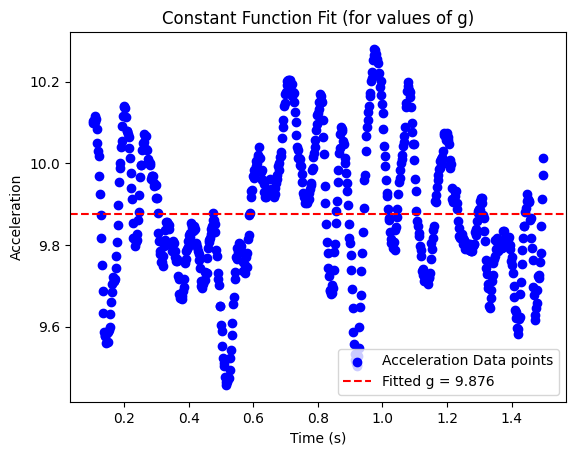

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Get the filtered acceleration data
acceleration = data_a['Absolute acceleration (m/s^2)'] \
    [(data_a['Absolute acceleration (m/s^2)'].index < 1.5) & \
     (data_a['Absolute acceleration (m/s^2)'].index > 0.1)]

# Generate the corresponding time values for the filtered acceleration data
time = acceleration.index.to_numpy()  # Use the index of the filtered data as time values

# Define the fitting function
def fit_constant_function(x, c):
    return c

# Perform the curve fitting
params, covariance = curve_fit(fit_constant_function, time, acceleration)
fitted_g = params[0]
print(f"Fitted constant value of g: {fitted_g}")

# Plot the results
plt.scatter(time, acceleration, label="Acceleration Data points", color="blue")
plt.axhline(fitted_g, color="red", linestyle="--", label="Fitted g = {:0.3f}".format(fitted_g))
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.title("Constant Function Fit (for values of g)")
plt.legend()
plt.show()

## Part 4: Advanced Visualization (8 points)
**Task: Interactive Plotting**  
Create a 2x2 subplot grid containing:  
- Raw 3D acceleration vs time
- checkout "Sharing x per column, y per row" in [matplotlib example](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) how it should look like

![Example](https://matplotlib.org/stable/_images/sphx_glr_subplots_demo_011_2_00x.png "Example")

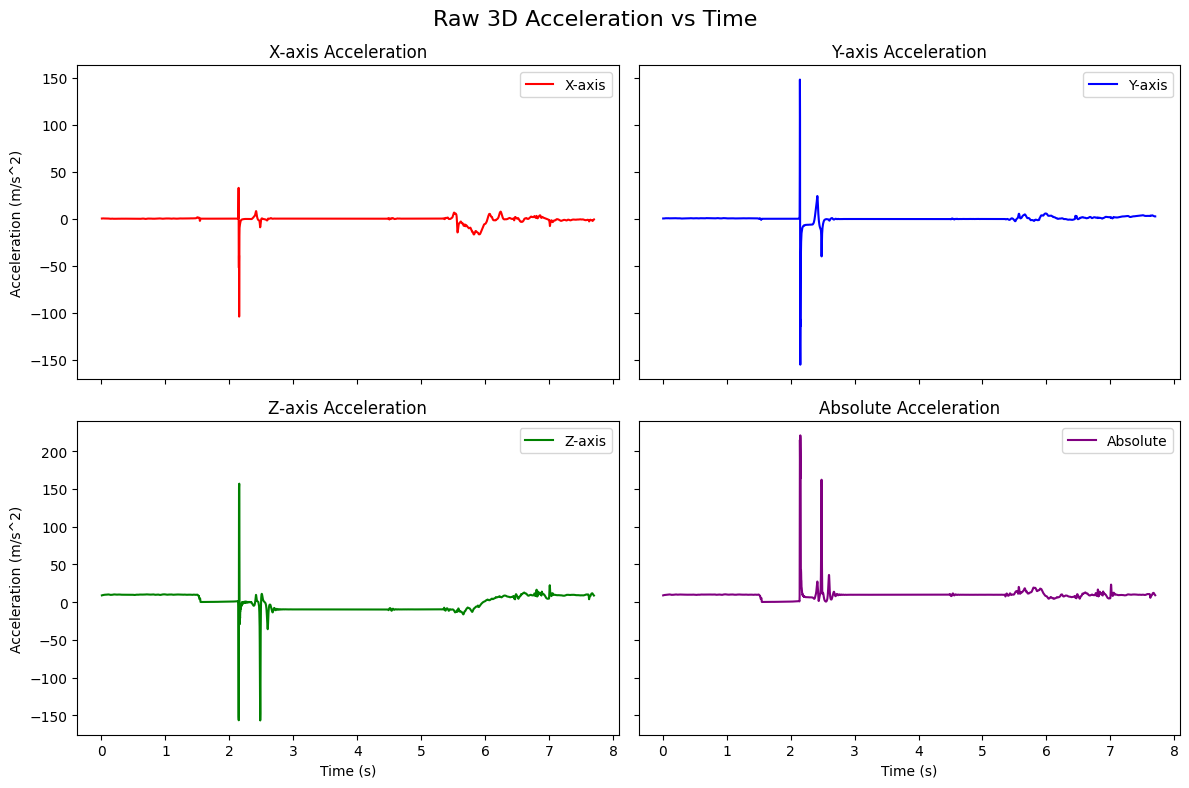

In [34]:


import matplotlib.pyplot as plt
# Assuming 'data_a' DataFrame is already loaded and contains the acceleration data

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex='col', sharey='row')
fig.suptitle('Raw 3D Acceleration vs Time', fontsize=16)

# Plot x-axis acceleration
axs[0, 0].plot(data_a.index, data_a['Acceleration x (m/s^2)'], color='red', label='X-axis')
axs[0, 0].set_ylabel('Acceleration (m/s^2)')
axs[0, 0].set_title('X-axis Acceleration')
axs[0, 0].legend()

# Plot y-axis acceleration
axs[0, 1].plot(data_a.index, data_a['Acceleration y (m/s^2)'], color='blue', label='Y-axis')
axs[0, 1].set_title('Y-axis Acceleration')
axs[0, 1].legend()

# Plot z-axis acceleration
axs[1, 0].plot(data_a.index, data_a['Acceleration z (m/s^2)'], color='green', label='Z-axis')
axs[1, 0].set_xlabel('Time (s)')
axs[1, 0].set_ylabel('Acceleration (m/s^2)')
axs[1, 0].set_title('Z-axis Acceleration')
axs[1, 0].legend()

# Plot absolute acceleration
axs[1, 1].plot(data_a.index, data_a['Absolute acceleration (m/s^2)'], color='purple', label='Absolute')
axs[1, 1].set_xlabel('Time (s)')
axs[1, 1].set_title('Absolute Acceleration')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


## Part 5: Error Propagation and Reporting (8 points)
**Task: Uncertainty Quantification**  
1. Calculate systematic error from phyphox sensor resolution
2. Compare experimental $g$ to local gravitational acceleration (use NOAA's geoid calculator)  
3. Discuss sources of discrepancy (sensor tilt, air resistance, etc.)

The sensor resolution of the accelerometer was 0.00479 m/s^2.

In [35]:

# Systematic error from sensor resolution
sensor_resolution = 0.00479  # m/s^2

systematic_error = sensor_resolution / 2  # Assuming +/- resolution

print(f"Systematic error due to sensor resolution: {systematic_error:.6f} m/s^2")



Systematic error due to sensor resolution: 0.002395 m/s^2


In [37]:


latitude = 42.8864  #  actual latitude
longitude = -78.8784  # actual longitude
geoid_height = 20  # actual geoid height from NOAA


def calculate_gravity(latitude, height):
    g = 9.780327 * (1 + 0.0053024 * np.sin(np.deg2rad(latitude))**2 - 0.0000058 * np.sin(np.deg2rad(2 * latitude))**2) \
        - 0.000003086 * height
    return g

local_gravity = calculate_gravity(latitude, geoid_height)

print(f"Calculated local gravitational acceleration: {local_gravity:.6f} m/s^2")

# Now compare fitted_g to local_gravity
print(f"Experimental g: {fitted_g:.6f} m/s^2")

discrepancy = abs(fitted_g - local_gravity)
print(f"Discrepancy between experimental g and local g: {discrepancy:.6f} m/s^2")



Calculated local gravitational acceleration: 9.804227 m/s^2
Experimental g: 9.875588 m/s^2
Discrepancy between experimental g and local g: 0.071360 m/s^2


The dicrepency in the NOAA data and experiemntal data value is due to the sensor resolution, orientation of the phone, the height from it was drpopped and aslo due to air resistance. The uncertainty and error can be reduced by performing experiment several times and also using high resolution acccelerometer.